In [19]:
import pandas as pd
import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from collections import Counter
import seaborn as sns


1.23.1


In [2]:
train_grouped = pd.read_csv("Training_Set_grouped.csv")
test_grouped = pd.read_csv("Testing_Set_grouped.csv")


In [3]:
train_grouped
# 79567 rows

test_grouped
# 19773 rows 

train_grouped = train_grouped.drop("Unnamed: 0", axis=1)
test_grouped = test_grouped.drop("Unnamed: 0", axis=1)

### Check distribution of readmission

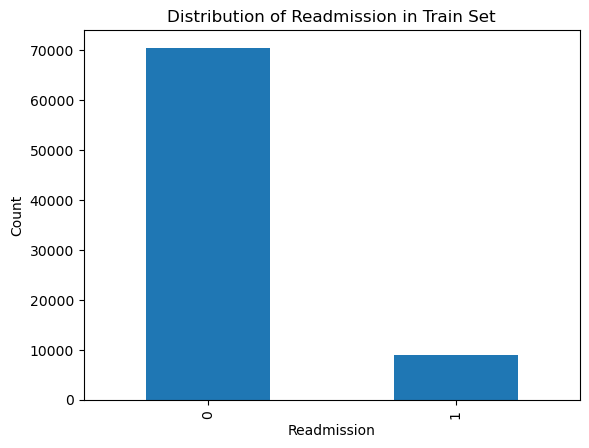

In [4]:
# Check distribution of race 
train_grouped["readmitted"].value_counts()

train_grouped["readmitted"].value_counts().plot(kind='bar')
plt.xlabel('Readmission')
plt.ylabel('Count')
plt.title('Distribution of Readmission in Train Set')
plt.show()

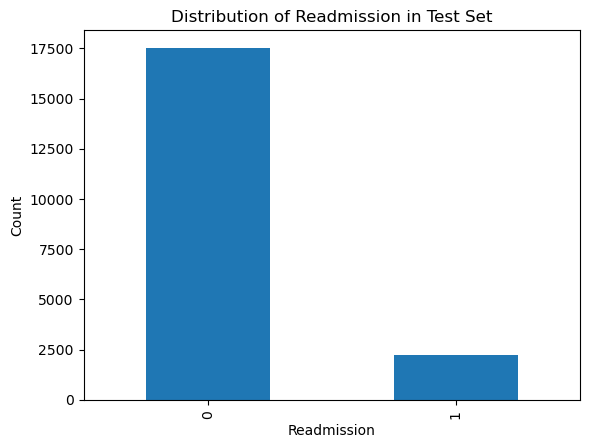

In [5]:
# Check distribution of race 
test_grouped["readmitted"].value_counts()

test_grouped["readmitted"].value_counts().plot(kind='bar')
plt.xlabel('Readmission')
plt.ylabel('Count')
plt.title('Distribution of Readmission in Test Set')
plt.show()

### SMOTE 

In [6]:
# Separate features and target variable
X_train = train_grouped.drop('readmitted', axis=1)
y_train = train_grouped['readmitted']

# Initialize SMOTE
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Identify the Minority Class: SMOTE works by taking the minority class (the class with fewer instances) and oversampling it to balance the class distribution.

Synthetic Sample Creation: For each sample in the minority class, SMOTE finds its k nearest neighbors (k is usually 5). These neighbors are chosen based on feature space similarity.

Create Synthetic Points: For each minority class sample, SMOTE selects one of its k nearest neighbors and generates new samples that are a linear interpolation between the two. This process effectively creates "synthetic" examples that are a bit different from existing examples.

Resulting Dataset: The end result is a more balanced dataset where the minority class is better represented. This can improve the performance of many machine learning models, especially for those algorithms sensitive to imbalanced datasets.

Counter({0: 70497, 1: 70497})


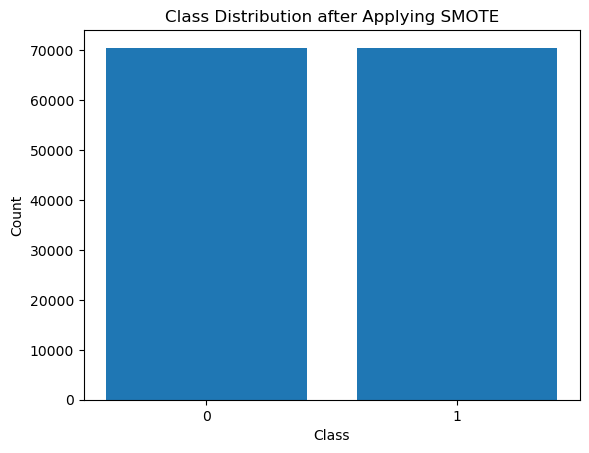

In [7]:
class_distribution = Counter(y_train_balanced)
print(class_distribution)

# Unpack the class labels and their counts
labels, counts = zip(*class_distribution.items())

# Create a bar plot
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after Applying SMOTE')
plt.xticks(labels)  
plt.show()


## Boruta

In [8]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Initialize Boruta
feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

feature_selector.fit(X_train_balanced.values, y_train_balanced.values)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	72
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	55
Tentative: 	9
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	55
Tentative: 	9
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	55
Tentative: 	9
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	55
Tentative: 	9
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	57
Tentative: 	7
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	57
Tentative: 	7
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	57
Tentative: 	7
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	57
Tentative: 	6
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	59
Tentative: 	4
Rejected: 	9
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=219, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x130962140),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x130962140,
         verbose=2)

In [13]:
# Check selected features
selected_features = X_train_balanced.columns[feature_selector.support_].tolist()
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])
selected_features_df


,Selected Features
0,age
1,time_in_hospital
2,num_lab_procedures
3,num_procedures
4,num_medications
5,number_outpatient
6,number_emergency
7,number_inpatient
8,number_diagnoses
9,med_count_1


In [16]:
all_features = X_train_balanced.columns.tolist()
not_selected_features = [feature for feature in all_features if feature not in selected_features]
not_selected_features_df = pd.DataFrame(not_selected_features, columns=['Not Selected Features'])
not_selected_features_df

,Not Selected Features
0,med_count_5
1,race_Asian
2,med_change_2_Mixed
3,med_change_3_Up
4,med_change_4_Up
5,med_change_5_NoMed
6,med_change_5_Steady
7,med_change_5_Up
8,discharge_group_5
9,admission_type_cleaned_4


In [21]:
rankings = feature_selector.ranking_

# Combine feature names with their rankings
features_and_rankings = list(zip(X_train_balanced.columns, rankings))

# Sort the features by their rankings
features_and_rankings_sorted = sorted(features_and_rankings, key=lambda x: x[1])

# Print or use the sorted list
for feature, ranking in features_and_rankings_sorted:
    print(f"Feature: {feature}, Ranking: {ranking}")


Feature: age, Ranking: 1
Feature: time_in_hospital, Ranking: 1
Feature: num_lab_procedures, Ranking: 1
Feature: num_procedures, Ranking: 1
Feature: num_medications, Ranking: 1
Feature: number_outpatient, Ranking: 1
Feature: number_emergency, Ranking: 1
Feature: number_inpatient, Ranking: 1
Feature: number_diagnoses, Ranking: 1
Feature: med_count_1, Ranking: 1
Feature: med_count_2, Ranking: 1
Feature: med_count_3, Ranking: 1
Feature: med_count_4, Ranking: 1
Feature: med_count_6, Ranking: 1
Feature: race_Caucasian, Ranking: 1
Feature: race_Hispanic, Ranking: 1
Feature: race_Other, Ranking: 1
Feature: race_Unknown, Ranking: 1
Feature: gender_Male, Ranking: 1
Feature: A1Cresult_>8, Ranking: 1
Feature: A1Cresult_Norm, Ranking: 1
Feature: A1Cresult_Not Taken, Ranking: 1
Feature: diabetesMed_Yes, Ranking: 1
Feature: med_change_1_NoMed, Ranking: 1
Feature: med_change_1_Steady, Ranking: 1
Feature: med_change_1_Up, Ranking: 1
Feature: med_change_2_NoMed, Ranking: 1
Feature: med_change_2_Steady, 

In [22]:
# List of features and their rankings
feature_rankings = [
    ("age", 1), ("time_in_hospital", 1), ("num_lab_procedures", 1),
    ("num_procedures", 1), ("num_medications", 1), ("number_outpatient", 1),
    ("number_emergency", 1), ("number_inpatient", 1), ("number_diagnoses", 1),
    ("med_count_1", 1), ("med_count_2", 1), ("med_count_3", 1),
    ("med_count_4", 1), ("med_count_6", 1), ("race_Caucasian", 1),
    ("race_Hispanic", 1), ("race_Other", 1), ("race_Unknown", 1),
    ("gender_Male", 1), ("A1Cresult_>8", 1), ("A1Cresult_Norm", 1),
    ("A1Cresult_Not Taken", 1), ("diabetesMed_Yes", 1), ("med_change_1_NoMed", 1),
    ("med_change_1_Steady", 1), ("med_change_1_Up", 1), ("med_change_2_NoMed", 1),
    ("med_change_2_Steady", 1), ("med_change_2_Up", 1), ("med_change_3_NoMed", 1),
    ("med_change_3_Steady", 1), ("med_change_4_NoMed", 1), ("med_change_4_Steady", 1),
    ("med_change_6_NoMed", 1), ("med_change_6_Steady", 1), ("med_change_6_Up", 1),
    ("med_change_other_Yes", 1), ("discharge_group_2", 1), ("discharge_group_3", 1),
    ("discharge_group_4", 1), ("discharge_group_7", 1), ("admission_type_cleaned_1", 1),
    ("admission_type_cleaned_2", 1), ("admission_type_cleaned_3", 1), ("admission_source_cleaned_1", 1),
    ("admission_source_cleaned_2", 1), ("admission_source_cleaned_3", 1), ("diag1_category_1", 1),
    ("diag1_category_2", 1), ("diag1_category_3", 1), ("diag1_category_4", 1),
    ("diag1_category_5", 1), ("diag1_category_6", 1), ("diag1_category_7", 1),
    ("diag1_category_8", 1), ("diag1_category_9", 1), ("max_glu_serum_cleaned_>300", 1),
    ("max_glu_serum_cleaned_Norm", 1), ("max_glu_serum_cleaned_Not Taken", 1),
    ("discharge_group_5", 2), ("race_Asian", 3), ("med_change_5_NoMed", 4),
    ("med_change_4_Up", 5), ("med_change_3_Up", 6), ("med_change_5_Steady", 7),
    ("admission_source_cleaned_4", 8), ("diag1_category_Unknown", 9),
    ("med_count_5", 10), ("admission_type_cleaned_4", 11),
    ("med_change_2_Mixed", 13), ("med_change_5_Up", 13), ("admission_source_cleaned_5", 13)
]

# Create DataFrame
df_feature_rankings = pd.DataFrame(feature_rankings, columns=['Feature', 'Ranking'])

# Display the DataFrame
df_feature_rankings


,Feature,Ranking
0,age,1
1,time_in_hospital,1
2,num_lab_procedures,1
3,num_procedures,1
4,num_medications,1
...,...,...
67,med_count_5,10
68,admission_type_cleaned_4,11
69,med_change_2_Mixed,13
70,med_change_5_Up,13


In [23]:
df_feature_rankings[df_feature_rankings["Ranking"] == 1]


,Feature,Ranking
0,age,1
1,time_in_hospital,1
2,num_lab_procedures,1
3,num_procedures,1
4,num_medications,1
5,number_outpatient,1
6,number_emergency,1
7,number_inpatient,1
8,number_diagnoses,1
9,med_count_1,1


In [24]:
X_train_balanced

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,med_count_1,...,diag1_category_4,diag1_category_5,diag1_category_6,diag1_category_7,diag1_category_8,diag1_category_9,diag1_category_Unknown,max_glu_serum_cleaned_>300,max_glu_serum_cleaned_Norm,max_glu_serum_cleaned_Not Taken
0,5,1,41,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
1,15,3,59,0,18,0,0,0,9,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
2,25,2,11,5,13,2,0,1,6,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
3,35,2,44,1,16,0,0,0,7,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
4,45,1,51,0,8,0,0,0,5,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140989,45,5,69,0,14,1,0,3,5,0,...,0.0,0.0,0.0,0.000000,0.710892,0.0,0.0,0.289108,0.0,0.710892
140990,75,3,24,0,17,1,2,4,7,0,...,0.0,0.0,0.0,0.682978,0.317022,0.0,0.0,0.682978,0.0,0.317022
140991,85,4,55,0,14,0,0,2,9,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
140992,65,3,1,1,10,0,0,0,3,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
